<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">

# **Project Overview: Synthetic Customer Transaction Data Generation with GANs**

## **🎯 Project Goal**
The goal of this project is to **generate synthetic customer transaction data** using **Generative Adversarial Networks (GANs)**. The synthetic data can be used for applications such as **customer segmentation**, **marketing strategies**, and **behavior analysis**. The project follows these main steps:

---

## **🧰 Steps Involved**

### 1. **📊 Data Preprocessing**
Before feeding the data into the GAN model, we need to preprocess it to ensure it's clean, consistent, and ready for modeling:
- **Remove duplicates**: Duplicate rows can distort the model's learning process.
- **Handle missing values**: Missing data can lead to biased or incomplete training, so we remove any rows with missing values.
- **Encode categorical data**: Since GANs work with numerical data, categorical columns (like job type, marital status) are **label-encoded** to convert them into numbers.
- **Scale numerical data**: We use **StandardScaler** to normalize the numerical features, ensuring the data is on a similar scale, which helps the GAN learn more effectively.

> **Note**: This preprocessing ensures the data is ready for training the GAN without any inconsistencies.

---

### 2. **🤖 Building the GAN Model**

The **Generative Adversarial Network (GAN)** consists of two parts:
- **Generator**: Takes random noise as input and generates synthetic data that looks like real customer transactions.
- **Discriminator**: Tries to distinguish between real and fake data. It helps the generator improve by providing feedback.

#### **💡 Key Points about GANs:**
- The **generator** and **discriminator** are trained together in a process called **adversarial training**.
- The **generator's goal** is to generate data that the **discriminator cannot distinguish** from real data.
- The **discriminator's goal** is to accurately classify whether the data is real or fake.

---

### 3. **🏋️‍♂️ Training the GAN**

During training, the **discriminator** is trained with real and fake data, while the **generator** is trained to fool the discriminator. The loss values of both models are calculated, and the models are updated accordingly.

> **Note**: Training GANs can take time, as the generator and discriminator need to continuously improve to produce realistic data.

---

### 4. **💥 Generating Synthetic Data**

Once the GAN is trained, we use the **generator** to create new, synthetic customer transaction data by passing random noise (latent space) into it. The generator produces new data that mimics the structure of the original dataset.

> **Tip**: By adjusting the **latent space** (random noise), we can generate different variations of the synthetic data.

---

### 5. **📂 Saving Synthetic Data**

The generated synthetic data is saved into a CSV file for use in further analysis or marketing applications. You can use this data for:
- **Customer segmentation**
- **Marketing strategies**
- **Behavior prediction**

---

## **🔑 Key Takeaways**

- **Data Preprocessing** is crucial for preparing the data and ensuring that the GAN can learn effectively.
- **GANs** consist of two parts: the **generator** (which creates data) and the **discriminator** (which judges data). They improve through adversarial training.
- **Synthetic data** generated by the GAN can be used to **simulate real-world customer behavior** and is ideal for **testing machine learning models** or **building marketing strategies**.

> **🔍 Example Applications:**
> - **Customer Segmentation**: Use synthetic data to group customers based on similar behavior patterns.
> - **Marketing**: Test marketing strategies on synthetic data before applying them to real customers.

---

## **🚀 Further Exploration**

- **Experiment with latent space**: Try using different latent dimensions to see how the generated data varies.
- **Add more features**: You can add more customer transaction features, such as **purchase frequency** or **customer location**, and retrain the GAN.
- **Explore advanced GAN architectures**: Look into other types of GANs like **DCGANs**, **WGANs**, or **CGANs** for more complex tasks.

---

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [31]:
# Suppress all warnings

In [32]:
import warnings

In [33]:
warnings.filterwarnings('ignore')

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [34]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [38]:
import tensorflow as tf

In [39]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense, LeakyReLU

In [41]:
from tensorflow.keras.optimizers import Adam

In [42]:
import numpy as np

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [43]:
# Load the dataset

In [44]:
dataset_path = "/content/bank.csv"

In [45]:
data = pd.read_csv(dataset_path, sep=';')

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [46]:
# Display initial dataset information

In [47]:
print("\nHead of the dataset:")
print(data.head())


Head of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [48]:
print("\nInfo about the dataset:")
print(data.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [49]:
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.00

In [50]:
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [51]:
duplicates = data.duplicated().sum()

In [52]:
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

## **Data Preprocessing**
Before training the GAN, the data must be preprocessed to ensure consistency and compatibility with the model. Here are the key tasks involved:

- **Remove Duplicates**: Duplicate records can skew the learning process of the GAN. We remove any rows that are identical across all features.
  
- **Handle Missing Values**: Missing data can reduce the model's accuracy, so any rows with missing values are removed. Alternatively, you could impute missing values, but removing them simplifies this example.
  
- **Label Encoding for Categorical Data**: Since GANs work with numerical data, categorical columns like "job type" and "marital status" are transformed into numbers. This is achieved using **LabelEncoder** from Scikit-learn, which assigns a unique integer to each category.
  
- **Scaling the Data**: We normalize the numerical features using **StandardScaler** to standardize them to a mean of 0 and a standard deviation of 1. This ensures that the GAN's training process is not biased toward any particular feature due to scale differences.

> **Why Preprocessing?**  
Preprocessing ensures that the data is in a format suitable for GANs to learn from and generate realistic synthetic data. Clean, encoded, and scaled data leads to better GAN performance.

In [53]:
# Clean the dataset: remove missing values and duplicates

In [54]:
data = data.dropna()

In [55]:
data = data.drop_duplicates()

In [56]:
# Encode categorical variables

In [57]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [58]:
label_encoders = {}

In [59]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [60]:
# Handle outliers using IQR method

In [61]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [62]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [63]:
# Scale the dataset

In [64]:
scaler = StandardScaler()

In [65]:
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [66]:
# Save cleaned and preprocessed datasets

In [67]:
cleaned_dataset_path = "/content/bank_cleaned.csv"

In [68]:
preprocessed_dataset_path = "/content/bank_preprocessed.csv"

In [69]:
data.to_csv(cleaned_dataset_path, index=False)

In [70]:
data.to_csv(preprocessed_dataset_path, index=False)

In [71]:
print(f"Cleaned dataset saved to: {cleaned_dataset_path}")
print(f"Preprocessed dataset saved to: {preprocessed_dataset_path}")

Cleaned dataset saved to: /content/bank_cleaned.csv
Preprocessed dataset saved to: /content/bank_preprocessed.csv


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [72]:
# Visualizations

In [74]:
# Histograms of numerical features

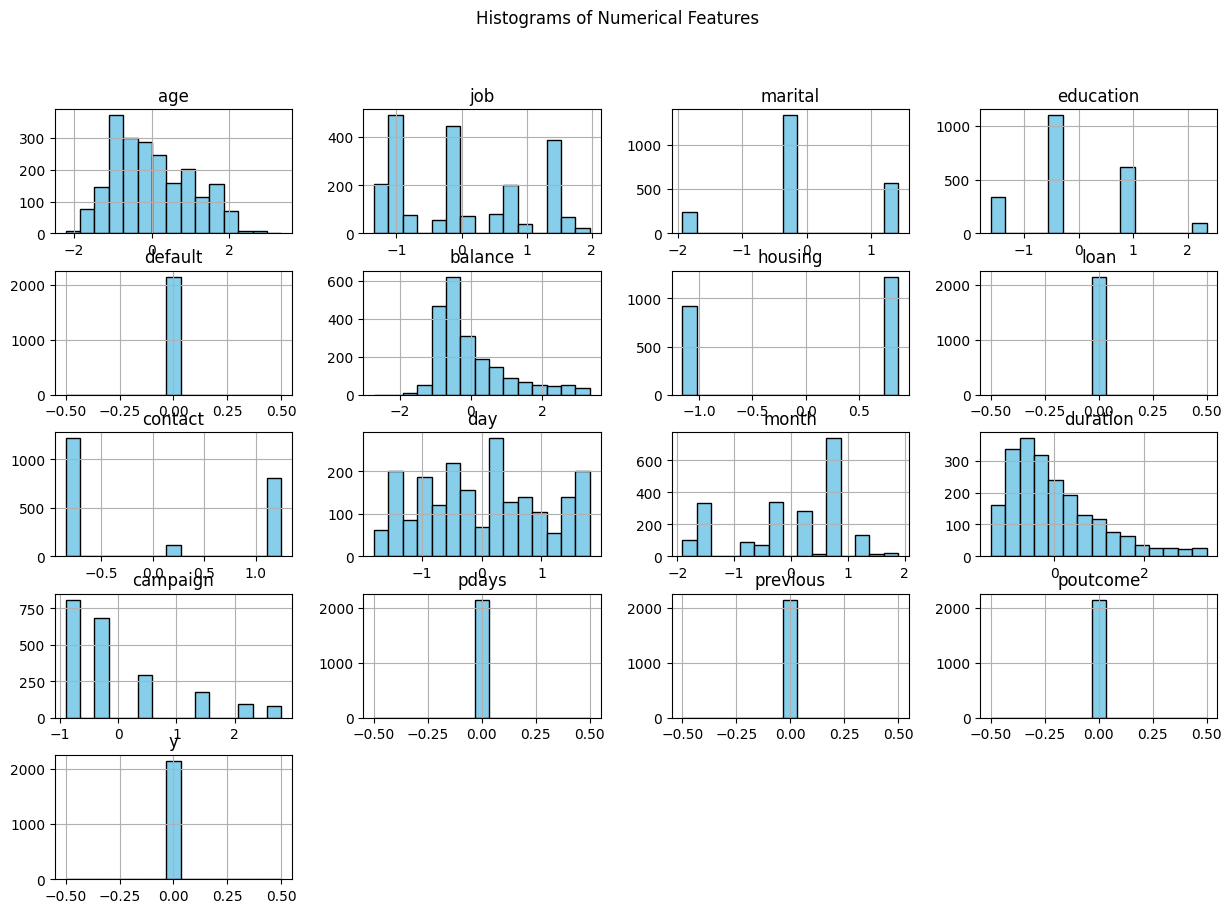

In [73]:
data[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [75]:
# Correlation heatmap

In [76]:
encoded_data = data.copy()

In [77]:
for col in categorical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(data[col])

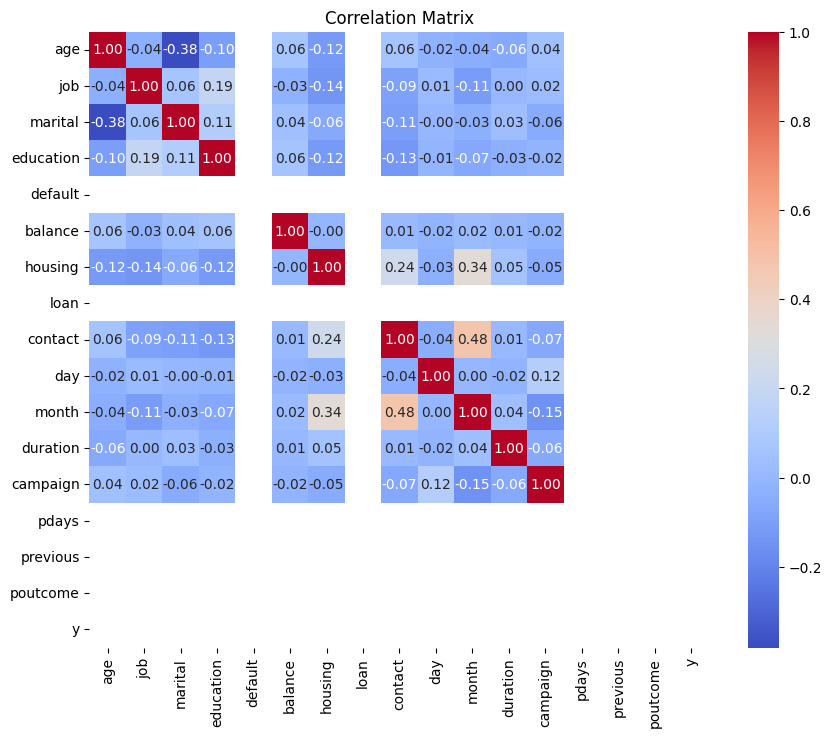

In [78]:
plt.figure(figsize=(10, 8))
corr = encoded_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [79]:
# Boxplots for numerical columns

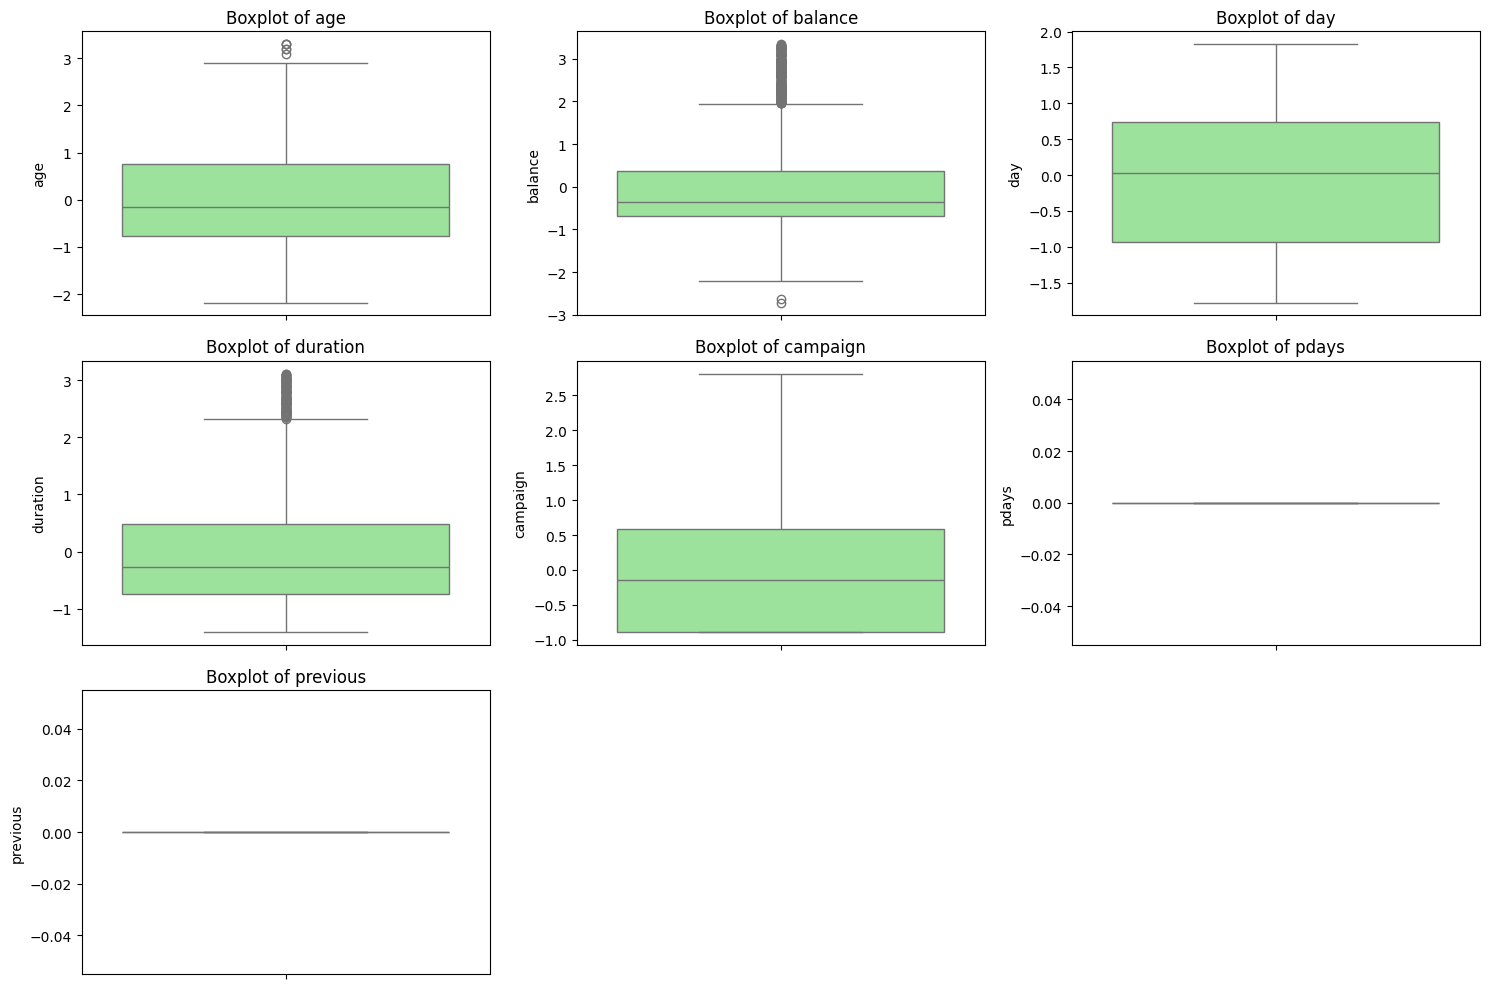

In [118]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [82]:
# Scatter plot matrix for numerical features

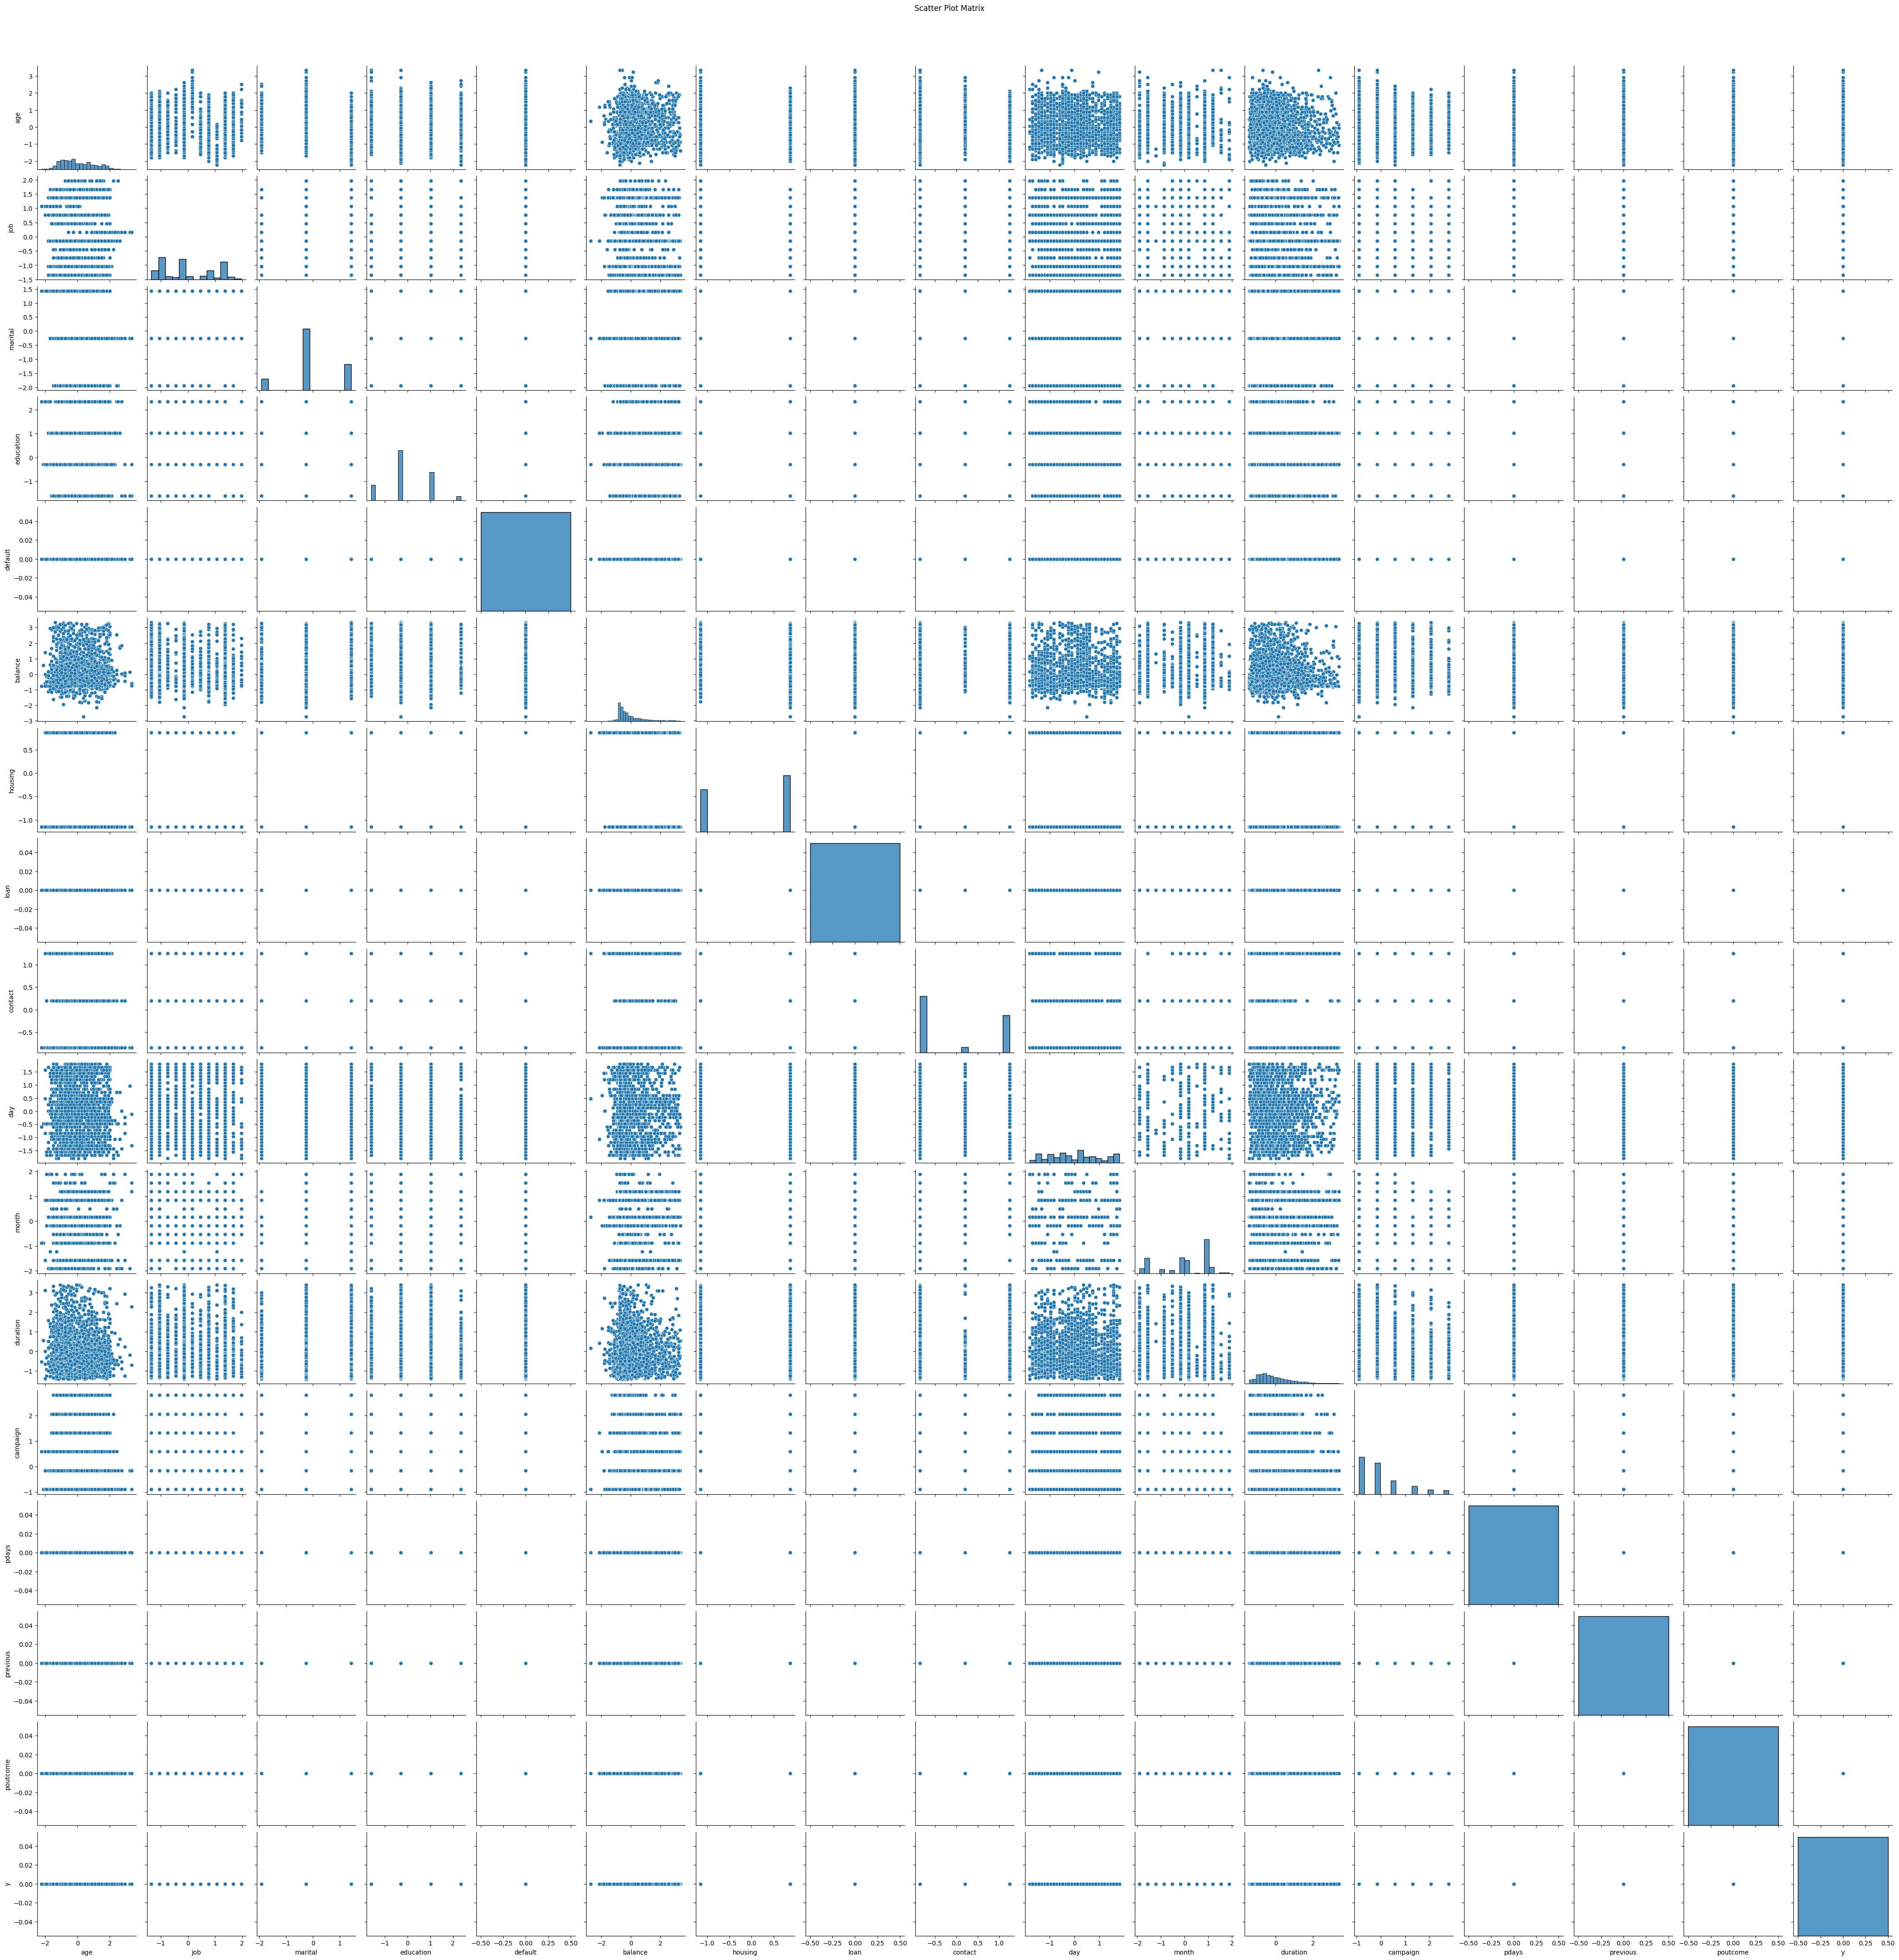

In [83]:
sns.pairplot(data[numerical_cols])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

## **Building the GAN Model**
In this step, we build the core components of the GAN, which are the **Generator** and **Discriminator**.

- **Generator**: The generator network is a neural network that takes random noise (latent space) as input and produces synthetic customer transaction data. The goal of the generator is to create data that closely resembles the real data.
  
- **Discriminator**: The discriminator is a binary classifier that distinguishes between real and fake data. It takes both real customer transaction data and synthetic data generated by the generator as input and predicts whether the data is real (label = 1) or fake (label = 0).

- **Architecture of Both Networks**: Both the generator and the discriminator consist of fully connected layers (Dense layers). The generator uses an input of random noise and transforms it into data with the same structure as the original dataset. The discriminator outputs a probability value indicating if the input data is real or fake.

> **Key Concept**:  
The GAN works by having the generator and discriminator compete against each other, with the generator trying to fool the discriminator and the discriminator trying to detect fake data. This dynamic helps the generator improve over time.

In [84]:
# Define GAN models

In [85]:
latent_dim = 100  # Latent space dimension (e.g., 100 for random noise input)


In [86]:
input_dim = data.shape[1]  # Number of features in the dataset

In [87]:
# Build the Generator model

In [88]:
def build_generator(latent_dim, input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(input_dim, activation='tanh'))  # Output size is the same as input data dimension
    return model

In [89]:
# Build the Discriminator model

In [90]:
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer: binary classification
    return model

In [91]:
# Build the GAN model (combining generator and discriminator)

In [92]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator while training the GAN
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [93]:
# Create the models

In [94]:
generator = build_generator(latent_dim, input_dim)

In [95]:
discriminator = build_discriminator(input_dim)

In [96]:
gan = build_gan(generator, discriminator)

In [97]:
# Compile the models

In [98]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])


In [99]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

## **Training the GAN**
Training a GAN is a two-part process, where both the generator and discriminator are trained iteratively:

1. **Train the Discriminator**:
   - In each iteration, a batch of real data and a batch of synthetic data (produced by the generator) are passed to the discriminator.
   - The discriminator learns to distinguish real data from fake data by adjusting its weights based on the feedback (loss) it receives.

2. **Train the Generator**:
   - The generator is trained to improve its ability to fool the discriminator.
   - It generates synthetic data, and the discriminator evaluates it. The generator's goal is to reduce the loss by producing data that the discriminator can no longer distinguish from real data.
  
3. **Loss Calculation**:
   - The **discriminator loss** is calculated using the binary cross-entropy between its predicted probabilities and the actual labels (1 for real data, 0 for fake data).
   - The **generator loss** is calculated using the binary cross-entropy between its predicted label for fake data (aiming to be 1) and the true label (0). The generator's objective is to minimize this loss.

> **Why Training is Important?**  
Training allows the generator and discriminator to learn their respective tasks. Over time, the generator gets better at producing realistic data, while the discriminator becomes more adept at detecting fake data.

In [101]:
# Training step for GAN

In [100]:
@tf.function
def train_gan_step(generator, discriminator, gan, real_data, batch_size, latent_dim):
    real_label = tf.ones((batch_size, 1))
    fake_label = tf.zeros((batch_size, 1))
    real_data = np.array(real_data)

    # Train discriminator with real data
    d_loss_real = discriminator.train_on_batch(real_data, real_label)

    # Generate fake data using the generator
    noise = tf.random.normal((batch_size, latent_dim))  # Use batch_size for fake data
    fake_data = generator(noise)

    # Train discriminator with fake data
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_label)

    # Average discriminator loss
    d_loss = 0.5 * (d_loss_real + d_loss_fake)

    # Train generator (via GAN)
    noise = tf.random.normal((batch_size, latent_dim))  # Batch size for generator training
    g_loss = gan.train_on_batch(noise, real_label)

    return d_loss, g_loss

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

## **Generating Synthetic Data**
Once the GAN is trained, we use the generator to generate new, synthetic data by passing **random noise** (latent space) into it.

- **Latent Space**: The random noise that serves as input to the generator. It's typically a vector of random values, and its size (dimensions) can be adjusted.
  
- **Synthetic Data Generation**: After training, the generator learns the patterns of the real data and can produce new synthetic data that looks like the real customer transaction data.

- **Variations**: By altering the random noise (latent space), we can generate different variations of synthetic data. This can be useful for simulating different customer behavior patterns or testing various marketing strategies.

> **Why Generate Synthetic Data?**  
Synthetic data generated by the GAN can be used in various applications such as customer segmentation, market simulations, or augmenting datasets for model training where real-world data might be scarce or confidential.

In [102]:
# Generate synthetic data

In [103]:
num_samples = 1000  # Number of synthetic data points to generate

In [104]:
noise = np.random.normal(0, 1, (num_samples, latent_dim))  # Latent space input


In [105]:
synthetic_data = generator.predict(noise)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

## **Saving Synthetic Data**
After generating the synthetic data, it is important to **save** it for further use.

- The synthetic data is saved into a **CSV file**, which can be used for tasks such as:
  - **Customer Segmentation**: Grouping customers based on similar behaviors.
  - **Marketing Analysis**: Testing marketing strategies on realistic, but synthetic data.
  - **Model Training**: Using synthetic data to augment existing datasets for training machine learning models.

- The CSV file format makes it easy to load the synthetic data into any data analysis or machine learning framework.

> **Why Save the Data?**  
Saving the synthetic data allows you to reuse it in different contexts, perform further analysis, or test machine learning models on data that mimics real-world patterns without privacy concerns.

In [106]:
# Save synthetic data to CSV

In [107]:
synthetic_data_df = pd.DataFrame(synthetic_data, columns=numerical_cols)

In [108]:
synthetic_data_path = "/content/synthetic_data.csv"

In [109]:
synthetic_data_df.to_csv(synthetic_data_path, index=False)

In [110]:
print(f"Synthetic data saved to: {synthetic_data_path}")

Synthetic data saved to: /content/synthetic_data.csv


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

## **Further Exploration (Optional)**
After completing the basic workflow, here are some **suggestions for further exploration**:

- **Experiment with Latent Space**: Try using different sizes for the latent vector to see how the generated data changes. A higher-dimensional latent space may give the generator more freedom to create complex patterns.
  
- **Add More Features**: You can add more features to the synthetic data, such as customer demographics, transaction time of day, or product categories.
  
- **Explore Advanced GANs**: You can try using more advanced GAN architectures like **DCGANs (Deep Convolutional GANs)** for image-related data, or **WGANs (Wasserstein GANs)** for more stable training.
  
- **Improve Data Quality**: Consider using **Conditional GANs (CGANs)** if you want to control specific aspects of the synthetic data (e.g., generating data based on a certain customer type).

> **Why Explore Further?**  
Exploring additional techniques allows you to create more sophisticated synthetic data, which can be used in a wider variety of applications.

In [111]:
# Visualize synthetic data (optional)

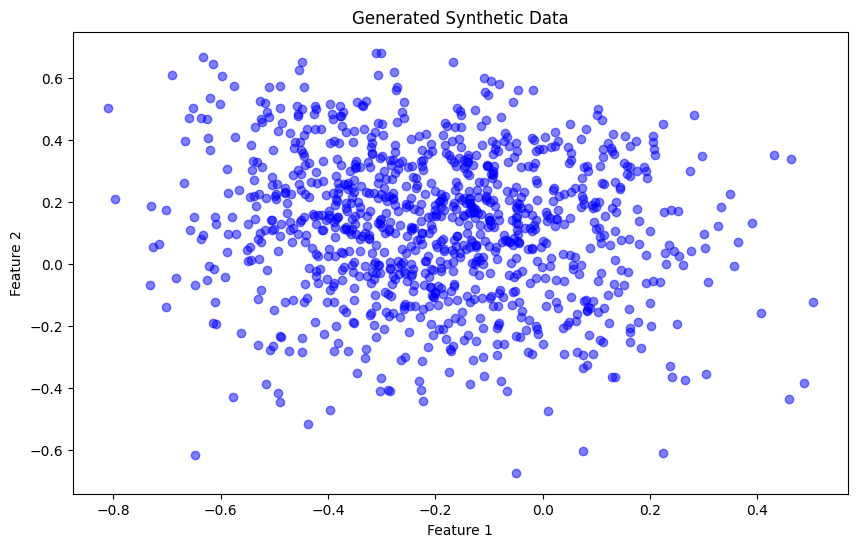

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], color='blue', alpha=0.5)
plt.title("Generated Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [113]:
# Compare statistics of real vs synthetic data

In [114]:
real_data_sample = data[numerical_cols].head(num_samples).values  # Select first `num_samples` real data points


In [115]:
print("Real data statistics:")
print("Mean:", np.mean(real_data_sample, axis=0))
print("Std Dev:", np.std(real_data_sample, axis=0))

Real data statistics:
Mean: [-0.02795262 -0.01204556 -0.01081124  0.00302457  0.         -0.00020609
  0.02216612  0.         -0.02416092  0.00739555  0.02151636 -0.03365887
 -0.02590143  0.          0.          0.          0.        ]
Std Dev: [0.98831606 1.0023818  1.00863702 1.01029485 0.         0.99447697
 0.99656729 0.         1.00173986 0.98817547 0.98150344 0.98532264
 0.96667774 0.         0.         0.         0.        ]


In [116]:
print("\nSynthetic data statistics:")
print("Mean:", np.mean(synthetic_data, axis=0))
print("Std Dev:", np.std(synthetic_data, axis=0))


Synthetic data statistics:
Mean: [-0.19628976  0.12088761 -0.08418372 -0.00558485  0.14554751  0.15316594
  0.12095536  0.06613892  0.11799106  0.10560314 -0.2996275   0.18366067
 -0.15112206 -0.1353672   0.26926762 -0.07806391 -0.01333045]
Std Dev: [0.22841416 0.23285842 0.22829573 0.22891055 0.20052208 0.21280488
 0.21755183 0.22136292 0.22814187 0.24647047 0.2084923  0.23465258
 0.23656145 0.24607797 0.2395759  0.21185486 0.21190065]


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

## **Conclusion**
In this project, we demonstrated how to **generate synthetic customer transaction data** using **Generative Adversarial Networks (GANs)**. Here's a summary of what we achieved:

- **Data Preprocessing**: We prepared the customer transaction dataset by removing duplicates, handling missing values, encoding categorical features, and scaling the data to ensure it was ready for training.
  
- **GAN Model Development**: We built and trained a GAN consisting of a generator and a discriminator. The generator learned to produce realistic synthetic data, while the discriminator worked to distinguish real data from the generated data.

- **Training Process**: We trained the GAN iteratively, refining both the generator and discriminator using adversarial feedback. This enabled the generator to improve its ability to create data that closely resembled real customer transactions.

- **Synthetic Data Generation**: After training, the generator was able to produce synthetic data that mimicked the original customer transaction data. This synthetic data can now be used for various purposes such as customer segmentation, marketing analysis, and training machine learning models.

- **Future Exploration**: Further exploration can include experimenting with different latent space dimensions, adding more features to the synthetic data, and exploring advanced GAN architectures like DCGANs or WGANs.

> **Key Takeaways**:
  - GANs are a powerful tool for generating synthetic data that can help overcome privacy concerns and data scarcity.
  - The adversarial nature of GANs enables them to generate increasingly realistic data over time.
  - The synthetic data generated in this project can be used in a variety of marketing and customer segmentation applications.

This approach opens up exciting possibilities for simulating customer behavior and testing various business strategies on synthetic but realistic datasets.

<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">